# HW 3: PCA and classification

## Note on the autograder:

For this homework, you will have access to numpy, matplotlib, seaborn, plotly, and scikit-learn. If you use a different import, it probably will not work!

In [1]:
# import packages for notebook (if needed)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In this assignment, we will 
1. write a wrapper class `Standard_PCA` that performs PCA with standardization
2. write a function `PCA_dim` to choose how many PCA modes to retain
3. apply PCA to a real dataset ([Diagnostic Wisconsin Breast Cancer Database]([https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic]))
4. compare models trained on original data and PCA-transformed data. 

## Submission:
For this homework, you will submit your completed copy of this `.ipynb` notebook as well as `pca.py`. In particular, see the sections below: **you should fill out all of the empty cells and answer the questions to receive full credit**.

## Part 1: Standardized PCA wrapper

In this part, you will write the `Standard_PCA` wrapper class, which will standardize the feature matrix $X$ and then fit the PCA to 
$$
Z = \frac{X-\text{mean}(X)}{\text{std}(X)}.
$$
At a minimum, you should include the following:
- `Standard_PCA(n_components)` constructor: creates a `Standard_PCA` object which will fit PCA with `n_components` components.
- `fit(X)`: standardize `X` (2D numpy array) and then fit the PCA to the standardized version; no return value.
- `fit_transform(X)`: standardize `X` and fit the PCA; return the projection onto the first `n_components` components
- `transform(X)`: return the projection of standardized version of `X` onto the first `n_components` PCA components if `fit` or `fit_transform` have already been run; otherwise, this function should raise a `NotFittedError` or similar

You can use `sklearn.decomposition.pca` or implement PCA by hand. Your code will be graded based on the following test examples:

In [2]:
# tests setup
from pca import Standard_PCA
import numpy as np

np.random.seed(42) # make sure to set the seed for reproducibility
X_train = np.random.randint(1, 9, size = (10, 5))
X_test = np.random.randint(1, 9, size = (5, 5))
X_train, X_test

(array([[7, 4, 5, 7, 3],
        [8, 5, 5, 7, 2],
        [3, 7, 3, 3, 8],
        [5, 4, 8, 8, 3],
        [6, 5, 2, 8, 4],
        [6, 6, 2, 8, 4],
        [5, 1, 4, 2, 6],
        [5, 4, 1, 1, 3],
        [3, 7, 2, 8, 4],
        [4, 8, 7, 6, 6]], dtype=int32),
 array([[7, 6, 3, 4, 7],
        [4, 8, 1, 3, 5],
        [3, 7, 5, 1, 7],
        [2, 4, 1, 4, 6],
        [2, 2, 1, 2, 5]], dtype=int32))

In [3]:
# fit_transform
st_pca = Standard_PCA(n_components=3)
X_pca_train = st_pca.fit_transform(X_train)
print('Transformed training data:\n', X_pca_train)

Transformed training data:
 [[ 1.59991141 -0.15089085  0.28596015]
 [ 2.21812625  0.08418577 -0.05777622]
 [-2.92931501  0.14097878  0.15127022]
 [ 1.20203024  0.74243326  1.51949031]
 [ 0.58507252  0.14063521 -0.96132349]
 [ 0.44771853  0.49595174 -1.11585164]
 [-0.64758589 -2.3333196   1.16612196]
 [-0.40083714 -1.97265084 -0.92886598]
 [-0.89310163  1.18052607 -1.16852899]
 [-1.18201927  1.67215046  1.10950368]]


In [4]:
# fit + transform
st_pca2 = Standard_PCA(n_components=2)
st_pca.fit(X_train)
X_pca_test = st_pca.transform(X_test)
print('Transformed test data:\n', X_pca_test)

Transformed test data:
 [[-0.69166924 -0.41894117 -0.04342768]
 [-1.77772183  0.06913104 -1.31884649]
 [-2.68196655 -0.07334732  0.92821079]
 [-2.24377332 -0.8772483  -0.53574244]
 [-1.89716545 -2.08815722 -0.26561001]]


## Part 2: PCA dimension

For visualizing data, you should use PCA with 2 or, at most, 3 principal components since we cannot visualize a higher-dimensional space. However, if we want to ensure a high proportion of explained variance by our PCA modes, the reduced dimension may need to be larger than 3. 

In this part, you will write the function `PCA_dim` that takes in a data matrix $X$ and threshold $0\leq p \leq 1$ as input and returns the least number of principal components `d` of the (standardized) PCA such that at least a fraction of the variance `p` is explained. It will be helpful to call your `Standard_PCA` class for this - however, your solution should only construct at most *one* instance of this class.

For example, recall the iris data $X$ in the lecture with cumulative explained variance [0.72, 0.96, 0.99, 1]. 
    
- If `PCA_dim(X, p=0.6)`, then your function should return d=1, which means only the first principal component is required.

- If `PCA_dim(X, p=0.9)`, then your function should return d=2, which means that the first two principal components are required.

Your code should also pass the two test examples below:

In [5]:
# Test example 1:

from sklearn.datasets import load_breast_cancer
from pca import PCA_dim

# read data
data = load_breast_cancer()
X = data.data

# threshold
p = 0.95

# call your function
d = PCA_dim(X, p)
print(f'{d} principal components are required to explain at least {100*p}% of variance.')

10 principal components are required to explain at least 95.0% of variance.


In [6]:
# Test example 2:

from sklearn.datasets import load_iris
data = load_iris()
X = data.data

# threshold
p = 0.98

# call your function
d = PCA_dim(X, p)
print(f'{d} principal components are required to explain at least {100*p}% of variance.')

3 principal components are required to explain at least 98.0% of variance.


## Part 3: Apply PCA to a real dataset


#### Step 1: read dataset

The next cell will load in our dataset with features X and labels y. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

In [7]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target

#### Step 2: Set up train-test split

Use 80% of the data to train the model and the rest for testing.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

**Question: Why do you need to perform the train-test split before running a dimensionality reduction algorithm?**

Answer: You need to perform the train-test split before running a dimesnionality reduction algorithm because if you don't, some of the training data will be used in the test data. Thus you cannot rely on the model to predict correctly since it is using data it has already seen.

#### Step 3: Dimension Reduction and visualization (3 pts)

The goal of this part is to compute the (standardized) PCA on the training data and then visualize the transformed training data samples in 2D.

Your plot will be graded based on correctness as well as including informative legends, labels, titles, etc.

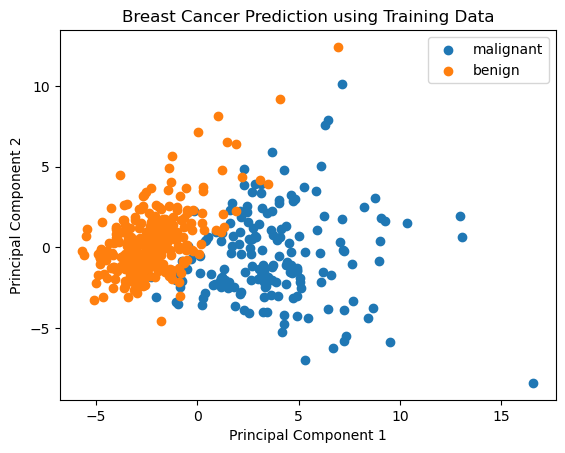

In [9]:
pca = Standard_PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)

target_name = data.target_names.tolist()
for label in np.unique(y):
    plt.scatter(X_pca_train[y_train == label, 0], X_pca_train[y_train == label, 1], label=target_name[label])
    plt.legend()
    
plt.title('Breast Cancer Prediction using Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

## Part 4: Train classification models on transformed data and original data

In this section, we would like to show that the test accuracy does not decrease too much when we use transformed data. You should do the following:

1. Repeat the train-test split 10 times. For each split:

    - Train a k-nearest neighbor (KNN) model with $k=5$ on the training data (original data without PCA transformation) and report accuracy on test data (original test data without PCA transformation).

    - Implement PCA with target dimensions 1-10. For each transformed data, train another KNN model with $k=5$, and then report the test accuracy. (Note: although you are training 10 new KNN models, you should only do PCA once!)

2. Visualize your results. The x-axis should be the number of principal components (1-10), and the y-axis should be average training accuracy (subplot 1) and test accuracy (subplot 2) over 10 experiments. Standard deviation should also be displayed by adding a shaded region (+/- 1 std. dev.). See sample plot below: labels etc. have been hidden but you should include them!

Your work will be graded based on correctness as well as including informative legends, labels, titles, etc.

In [33]:
KNN_original_train = []
KNN_original_test = []
KNN_pca_test = np.empty((10,10))
KNN_pca_train = np.empty((10,10))

for i in range(10):
    # re split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # KNN without PCA transform
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    acc = neigh.score(X_train, y_train)
    KNN_original_train.append(acc)

    KNN_original_test.append(neigh.score(X_test, y_test))

    # report accuracy
    print("KNN accuracy without PCA transform:", acc)

    # PCA
    pca = Standard_PCA(n_components=10)
    X_PCA_train = pca.fit_transform(X_train)
    X_PCA_test = pca.transform(X_test)

    for j in range(10):
        # get the ith component of the full train/test pca
        X_PCA_train_curr = X_PCA_train[:, :j+1]
        X_PCA_test_curr = X_PCA_test[:, :j+1]

        # fit the kneighbors with the current train component(s)
        neigh1 = KNeighborsClassifier(n_neighbors=5)
        neigh1.fit(X_PCA_train_curr, y_train)
        
        # get train accuracy
        acc1 = neigh1.score(X_PCA_train_curr, y_train)
        KNN_pca_train[i, j] = acc1

        # get test accuracy
        acc2 = neigh1.score(X_PCA_test_curr, y_test)
        KNN_pca_test[i, j] = acc2
        # report test accuracy
        #print('KNN test accuracy with PCA transform:', acc2)

# get each mean and std
KNN_original_train_mean = np.mean(KNN_original_train)
KNN_original_train_std = np.std(KNN_original_train)

KNN_original_test_mean = np.mean(KNN_original_test)
KNN_original_test_std = np.std(KNN_original_test)

KNN_pca_test_mean = np.mean(KNN_pca_test, axis=0)
KNN_pca_test_std = np.std(KNN_pca_test, axis=0)

KNN_pca_train_mean = np.mean(KNN_pca_train, axis=0)
KNN_pca_train_std = np.std(KNN_pca_train, axis=0)

print(KNN_original_train_std)
print(KNN_original_test_std)

KNN accuracy without PCA transform: 0.9472527472527472
KNN accuracy without PCA transform: 0.9516483516483516
KNN accuracy without PCA transform: 0.9538461538461539
KNN accuracy without PCA transform: 0.9494505494505494
KNN accuracy without PCA transform: 0.9516483516483516
KNN accuracy without PCA transform: 0.945054945054945
KNN accuracy without PCA transform: 0.9406593406593406
KNN accuracy without PCA transform: 0.9516483516483516
KNN accuracy without PCA transform: 0.9472527472527472
KNN accuracy without PCA transform: 0.945054945054945
0.0038382965267193384
0.018895315112752636


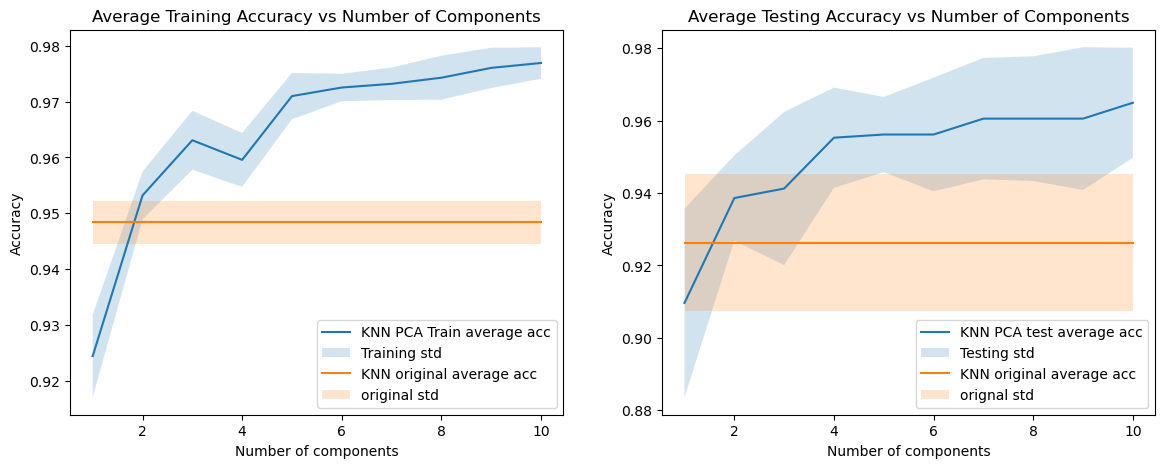

In [34]:
# visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
components = np.arange(1, 11)
KNN_o_train_mean = np.full(10, KNN_original_train_mean)
KNN_o_test_mean = np.full(10, KNN_original_test_mean)


# PLOT 1:

# average training accuracy
ax[0].plot(components, KNN_pca_train_mean, label = 'KNN PCA Train average acc')
ax[0].fill_between(components, KNN_pca_train_mean - KNN_pca_train_std,
                  KNN_pca_train_mean + KNN_pca_train_std, alpha = .2, label = 'Training std')

# average original KNN accuracy
ax[0].plot(components, KNN_o_train_mean, c = 'tab:orange', label = 'KNN original average acc')
ax[0].fill_between(components, KNN_original_train_mean - KNN_original_train_std, KNN_original_train_mean + KNN_original_train_std,
                   alpha = .2, label = 'original std')

ax[0].legend()
ax[0].set_title('Average Training Accuracy vs Number of Components')
ax[0].set_xlabel('Number of components')
ax[0].set_ylabel("Accuracy")


# PLOT 2:

# average test accuracy
ax[1].plot(components, KNN_pca_test_mean, label = 'KNN PCA test average acc')
ax[1].fill_between(components, KNN_pca_test_mean - KNN_pca_test_std,
                  KNN_pca_test_mean + KNN_pca_test_std, alpha = .2, label='Testing std')

ax[1].plot(components, KNN_o_test_mean, c = 'tab:orange', label = 'KNN original average acc')
ax[1].fill_between(components, KNN_original_test_mean - KNN_original_test_std, KNN_original_test_mean + KNN_original_test_std,
                   alpha = .2, label = 'orignal std')

ax[1].legend()
ax[1].set_title('Average Testing Accuracy vs Number of Components')
ax[1].set_xlabel('Number of components')
ax[1].set_ylabel("Accuracy")

plt.show()

**Question: How do the results compare between the models trained using the full data vs the PCA components? Why do you think this occurred?**

Answer: The model trained on the full data does better than the model trained on the PCA components as can be seen by the test accuracy. I think this happened because the modle trained on the full data has more information to learn from compared to just the components where the average takes into account the prediction made based on just a few components. 